## Term Project Milestone 1: Data Selection and EDA

### Disney Park Reviews Narrative

The focus point of my data mining project is on the Disney Theme Parks and the reviews they receive throughout guests visits. As this model will be used to break down guests’ reviews using Data Visualizations using matplotlib and seaborn that will create graphs that focus on different aspects of the reviews Disney has received. Next this project will focus on data preparation and modification to the data set by manipulating the data set to drop unneeded values, while also researching into missing values that are needed, and editing the given reviews to remove unneeded stop words, punctuation, and more. Last this report will be split into training and test set that will allow users to create regression that will show the shape, accuracy, precision, and recall of our regression regarding the reviews evaluated. As the problem this model will address is the mass amounts of reviews Disney receives a day, determine where these reviews are coming from, what parks / areas the reviews are referencing, are these review negative or positive with sentiment analysis, and determine the steps the company will need to take to improve on their guest’s feedback. By streamlining this process workers will be able to determine reviews that need responses and or even a call to guests to see what the park can do to better the guests experience. As these reviews can determine whether some new guests will come and if existing guests that left a review will return. In the end Disney is a theme park that is focused on supplying their guests with a memorable experience that will spark into a reoccurring customer that comes back for years to come.  

In [2]:
# First I will import some needed libraries
import pandas as pd
from importlib import reload
import sys
import numpy as np
from imp import reload
import nltk
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
%matplotlib inline
import seaborn as sns 
import re
import string
from nltk.stem import WordNetLemmatizer
import warnings
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
warnings.filterwarnings('ignore')
if sys.version[0] == '2':
    reload(sys)
    sys.setdefaultencoding("utf-8")

### Importing the Data

In [3]:
# I will use pandas to pull the data to create a data frame to work from
Disney_Data = pd.read_csv('DisneylandReviews.csv')
Disney_Data

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...,...,...
42651,1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris
42652,1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris
42653,1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris
42654,1618637,4,missing,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris


### Reviewing the Data Set

In [4]:
# Next I will display the dimensions of the disney dataframe
Disney_Data.shape

(42656, 6)

As seen above we see that we have six columns with 42,656 rows of data.

In [5]:
# Next I will use info to see further information on each of my variables.
Disney_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42656 non-null  int64 
 1   Rating             42656 non-null  int64 
 2   Year_Month         42656 non-null  object
 3   Reviewer_Location  42656 non-null  object
 4   Review_Text        42656 non-null  object
 5   Branch             42656 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


As seen above we see that our Review_ID and Rating are the int64 Dtype. While the remaining variables are object Dtype.

In [6]:
# As seen above in the dataframe we see that the Year_Month variable has missing data in the last five rows. 
# Which we will use pandas to read the data again and specify the data with NA values as missing.
Disney_Data = pd.read_csv('DisneylandReviews.csv', encoding = 'ISO-8859-1', na_values = 'missing')
Disney_Data.tail()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
42651,1765031,5,NaN,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris
42652,1659553,5,NaN,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris
42653,1645894,5,NaN,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris
42654,1618637,4,NaN,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris
42655,1536786,4,NaN,United Kingdom,"I went to the Disneyparis resort, in 1996, wit...",Disneyland_Paris


In [7]:
# Next I will check and what variables have NA values and what percentage of the variable is NA
Disney_Data.isnull().sum()/len(Disney_Data)

Review_ID            0.000000
Rating               0.000000
Year_Month           0.061258
Reviewer_Location    0.000000
Review_Text          0.000000
Branch               0.000000
dtype: float64

As seen above we see that the Year_Month variable is the only variable with NA data and only being 6% of all the data. Due to the low rate we will keep these NAs as we are looking to analyse the review variable data.

### Searching for Duplicate Review IDs

In [8]:
# Next I will use the value_count to see if the data set has duplicate
# Reviews for the same id number.
Disney_Data.Review_ID.value_counts().head(25)

166787525    2
129231609    2
164862064    2
121570980    2
129214104    2
121580686    2
121615136    2
166784597    2
166787635    2
129207323    2
121568004    2
166730734    2
121586148    2
121578357    2
166753649    2
226905150    2
166754595    2
164830205    2
121615246    2
168489234    2
437267056    1
180482699    1
157444688    1
124676711    1
172510999    1
Name: Review_ID, dtype: int64

In [14]:
# Next I will pull up one of the Review IDs that is duplicate and
# see if it is the same text or different.
Disney_Data[Disney_Data.Review_ID == 166753649]

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
24019,166753649,5,2013-7,United States,Went to Disneyland and California Adventure on...,Disneyland_California
24027,166753649,5,2013-7,United States,Went to Disneyland and California Adventure on...,Disneyland_California


In [13]:
# I will pull up another one of the Review IDs that is duplicate and
# see if it is the same text or different.
Disney_Data[Disney_Data.Review_ID == 164862064]

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
24019,166753649,5,2013-7,United States,Went to Disneyland and California Adventure on...,Disneyland_California
24027,166753649,5,2013-7,United States,Went to Disneyland and California Adventure on...,Disneyland_California


As seen above we can see that the duplicate review_text is the same so I will drop the duplicates

In [15]:
# I will now use drop to drop my duplicate Review_IDs and keep the first
Disney_Data.drop_duplicates(subset='Review_ID', inplace=True, keep='first')
Disney_Data.shape

(42636, 6)

As seen above we can see in our shape that we removed several lines. 

### Seperating the Year_Month Variable

In [16]:
## I will use str.split to split my month and year variable to 
# create seperate variable.
Disney_Date = Disney_Data['Year_Month'].str.split('-')
Disney_Date

0        [2019, 4]
1        [2019, 5]
2        [2019, 4]
3        [2019, 4]
4        [2019, 4]
           ...    
42651          NaN
42652          NaN
42653          NaN
42654          NaN
42655          NaN
Name: Year_Month, Length: 42636, dtype: object

In [20]:
# Next I will create two new variables for year and month through the use of str
Disney_Data['Year'] = Disney_Date.str[0]
Disney_Data['Month'] = Disney_Date.str[1]

In [21]:
# Next I will use head to view the first five columns of the 
# updated data set variables.
Disney_Data.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Year,Month
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,2019,4
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,2019,5
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,2019,4
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,2019,4
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,2019,4


As seen above we see that the two new variables year and month have been created. Which can be used in the graphical analysis to further review

### Graphical Analysis 

### Data Visualization 1: Bar Chart - Disney Review Ratings

In [41]:
# First I will create a count of the dataframes ratings to 
# determine the value of each rating. 
rate_value = Disney_Data.Rating.value_counts()

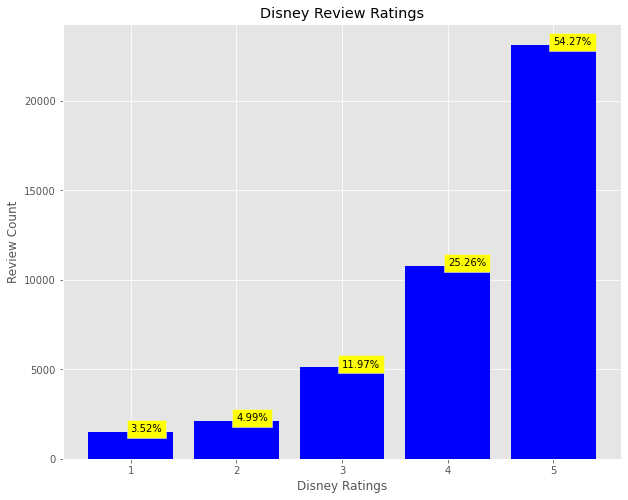

In [86]:
# I will use plt to create a data visualization that will 
# show the  Number of Reviews vs the ratings they fall within
with plt.style.context('ggplot'):
    plt.figure(figsize=(10, 8))
    plt.bar(rate_value.index, rate_value.values, color='blue')
    for rating, value in zip(rate_value.index, rate_value.values):
        plt.text(rating, value, str(round(value/sum(rate_value.values)*100, 2))+'%', 
                color='black', bbox=dict(facecolor='yellow'))
    plt.title('Disney Review Ratings')
    plt.xlabel('Disney Ratings')
    plt.ylabel('Review Count')
    plt.yticks(np.arange(0, 25000, 5000))

As seen above we see that are reviews scale range from 1 to 5 with 5 being the highest rating and 1 being the worst. In this graph we see that more than 50% of Disneys ratings are 5 star ratings while Disney has less than 10% ratings for both 1 and 2 star ratings. 

### Data Visualization 2: Seaborn cat bar plot  - Ratings by Year for Each Park Branch

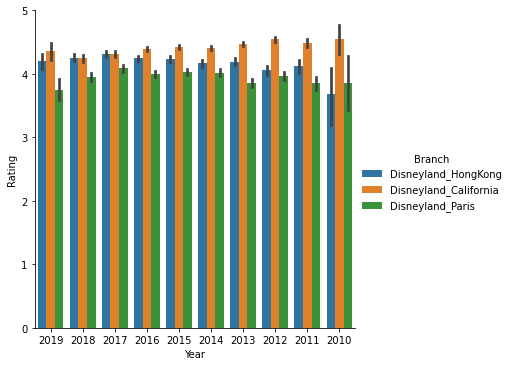

In [141]:
sns.catplot(data = Disney_Data, x = 'Year', y = 'Rating', hue = 'Branch', kind = "bar")

The seaborn cat bar plot above shows that the average rating for each branch and or park is staying between three and four star average ratings. Which is great for the parks but as we do see that HongKongs parks has seen dips in 2010 but steadily rises throughout the years. While DisneyLand California maintained a average rating above 4 throughout the years.

### Data Visualization 3: Horizontal Bar Chart - Average Rating Based on Park Location

In [112]:
# First I will create a rating value for each park location
Park_rating = Disney_Data.groupby('Branch').agg({'Rating': 'mean'}).unstack()['Rating']

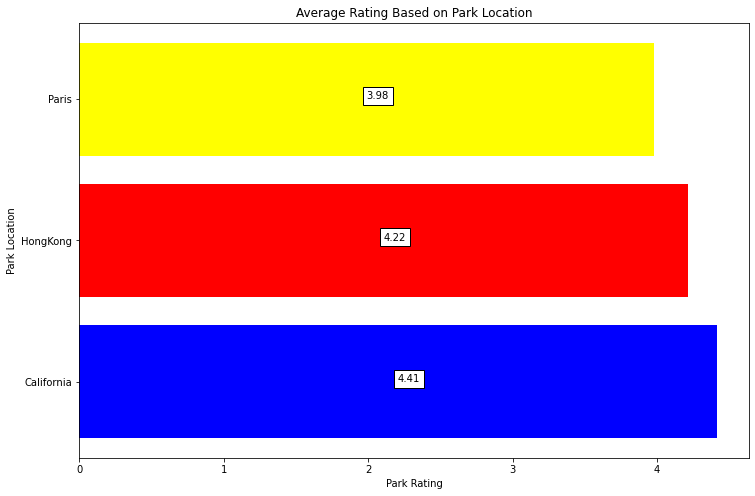

In [116]:
# I will now create a scatter plot that shows the average rate 
# for each park location through the use of plt and a for statement.
plt.figure(figsize=(12, 8))
plt.barh([branch[11:] for branch in Park_rating.index], 
         Park_rating.values, color=['blue', 'red', 'yellow'])
for value, park in zip(Park_rating.values, [branch[11:] for branch in Park_rating.index]):
    plt.text(value/2, park, round(value, 2), bbox=dict(facecolor='white'))
plt.xlabel('Park Rating')
plt.ylabel('Park Location')
plt.title('Average Rating Based on Park Location')
plt.xticks(np.arange(0, 5))
plt.show()

Seen above in the horizontal bar graph we see that Californa had the highest rating out of the three parks with a 4.41 and Paris in last with a average rating of 3.98 out of 5. These score can be jsutified as California is on of Disneys main parks so they tend to have better customer service and reviews due to the fact that the castmembers at that location are trained by individuals that have been with the company since it started. 

### Data Visualization 4: Seaborn Count Plot - Review Ratings Per Year

<AxesSubplot:xlabel='Year', ylabel='count'>

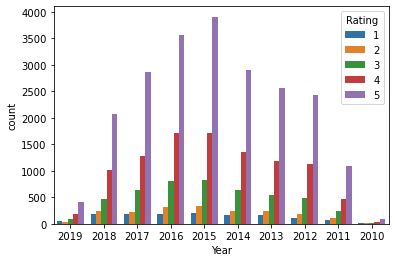

In [142]:
sns.countplot(data = Disney_Data, x = 'Year', hue = 'Rating')

The seaborn countplot above shows that as the years go from 2010 / 2011 to 2015 we see a rise in reviews for the theme parks. But as we go on from 2015 to 2019 we see a decline in reviews. Which I found verey interesting as I believe Disney would still be receiving alot if not more reviews btu this could be due to incomplete data.

### Conclusion

The graphical analysis of this project has shown me that the overall percentage of reviews had 54.27% with five-star reviews and less than 10% with one- or two-star ratings. As this shows Disney for the most part is receiving positive feedback from their guests. But for the 10% that is not happy with their experience how is Disney dealing with this review rating and or do they even realize they have these low reviews? As in the “Ratings by Year for Each Park” cat bar plot we see that Disneyland Paris is the park that is receiving the lowest review ratings throughout the years. Which could be due to issues stemming from tat park alone that needs to be addressed by workers in the United States and or Disneyland California. While the average rating for Disneyland Paris is 3.98 while Hong Kong and California parks sit at a 4.22% and 4.41%. As this project continues we will dive deeper into the reviews given by guests and determine if the reviews reflect the ratings they received. 

## Term Project Milestone 2: Data Preparation

### Drop any features that are not useful for your model building and explain why they are not useful.

In [1]:
# First I will pull up my data and view the current dataframe
Disney_Data.head()

NameError: name 'Disney_Data' is not defined

### Perform any data extraction/selection steps.

### Transform features if necessary.

### Engineer new useful features.

### Deal with missing data (do not just drop rows or columns without justifying this).

### Create dummy variables if necessary.